<a href="https://colab.research.google.com/github/Menon-Madhav/Computer_Vision/blob/main/Fashion_MNIST_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imported all necessary libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models,layers, datasets
import pandas as pd

load all data

In [2]:
(train_img, train_label), (test_img, test_label) = datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


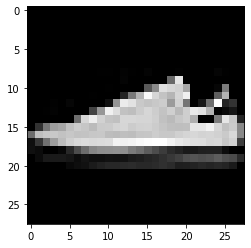

In [ ]:

plt.imshow(train_img[6], cmap='gray')
plt.show()

splitting train data into train and validation data

In [3]:
img_train = train_img[0:49980]
label_train = train_label[0:49980]
img_val = train_img[49980:]
label_val = train_label[49980:]

In [6]:
print(img_train.shape)
print(label_train.shape)
print(img_val.shape)
print(label_val.shape)


(49980, 28, 28)
(49980,)
(10020, 28, 28)
(10020,)


In [7]:
img_train = np.reshape(img_train , (49980, 28, 28, 1))
img_val = np.reshape(img_val , (10020, 28, 28, 1))



model for the CNN Architecture

In [9]:
model_2 = models.Sequential()
model_2.add(layers.Conv2D(64, kernel_size= (3, 3), strides = (1,1), activation= 'relu', input_shape=(28, 28, 1) ))
model_2.add(layers.MaxPool2D())
model_2.add(layers.Conv2D(64, kernel_size= (3,3), strides = (1,1), activation='relu' ))
model_2.add(layers.MaxPool2D())
model_2.add(layers.Flatten())
model_2.add(layers.Dense(256, activation='relu'))
model_2.add(layers.Dense(10, activation='softmax'))

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               409856    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [12]:
model_2.compile( optimizer = 'adam', 
               loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics = ['accuracy'])
history = model_2.fit(img_train, label_train, epochs = 20, validation_data = (img_val, label_val))

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


1562/1562 [==============================] - 77s 49ms/step - loss: 0.7095 - accuracy: 0.8142 - val_loss: 0.3777 - val_accuracy: 0.8628
Epoch 2/20
1562/1562 [==============================] - 76s 48ms/step - loss: 0.3571 - accuracy: 0.8657 - val_loss: 0.3786 - val_accuracy: 0.8650
Epoch 3/20
1562/1562 [==============================] - 75s 48ms/step - loss: 0.3085 - accuracy: 0.8837 - val_loss: 0.3339 - val_accuracy: 0.8761
Epoch 4/20
1562/1562 [==============================] - 75s 48ms/step - loss: 0.2839 - accuracy: 0.8930 - val_loss: 0.3356 - val_accuracy: 0.8869
Epoch 5/20
1562/1562 [==============================] - 74s 48ms/step - loss: 0.2607 - accuracy: 0.9012 - val_loss: 0.3388 - val_accuracy: 0.8824
Epoch 6/20
1562/1562 [==============================] - 74s 48ms/step - loss: 0.2424 - accuracy: 0.9079 - val_loss: 0.3376 - val_accuracy: 0.8826
Epoch 7/20
1562/1562 [==============================] - 74s 48ms/step - loss: 0.2268 - accuracy: 0.9135 - val_loss: 0.3543 - val_accura